# Tarea Sesión 3

Los datos del mundo real están sucios. De hecho, alrededor del 80% del tiempo de un científico de datos se dedica a recopilar, limpiar y preparar los datos. Estos pasos tediosos (pero necesarios) hacen que los datos sean adecuados para cualquier modelo que queramos construir y aseguran la alta calidad de los datos.

La limpieza y la preparación de los datos puede ser complicada a veces, por lo que en este artículo me gustaría facilitar estos procesos mostrando algunas técnicas, métodos y funciones utilizadas para limpiar y preparar los datos. Para ello, se utilizará un conjunto de datos de Netflix disponible en Kaggle (https://www.kaggle.com/datasets/shivamb/netflix-shows) que contiene información sobre todos los títulos de Netflix. Se usa este conjuntos de datos de películas porque se utilizan con frecuencia en los tutoriales para muchos proyectos de ciencia de datos, como el análisis de sentimientos y la construcción de un sistema de recomendación.

Aunque el conjunto de datos de Kaggle puede parecer bien organizado, no está listo para ser utilizado, por lo que se deben identificar los datos que faltan, los valores atípicos, los datos inconsistentes y se hará la normalización del texto.

## Obtener los datos

Antes de adquirir los datos se deben indicar las librerías que serán utilizadas en este ejercicio. Es recomendable tener una sección para importar librerías. Esto es generalmente preferido que tener las librerías importadas por todo el código fuente.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import io as io

Luego de importar las librerías entonces se pueden cargar los datos desde el archivo:

In [3]:
df_netflix = pd.read_csv("netflix_titles.csv")

Se verifica si los datos fueron cargados de manera correcta

In [4]:
print("netflix_titles.csv:" + str(df_netflix.shape))

netflix_titles.csv:(8807, 12)


In [ ]:
df_netflix.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df_netflix.tail(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


## Vista preliminar de los datos

Lo primero que hay que hacer una vez que se ha descargado un conjunto de datos es comprobar el tipo de datos de cada columna (los valores de una columna pueden contener dígitos, pero pueden no ser de tipo datetime o int).

In [ ]:
df_netflix.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

Identificar los tipos de datos de las columnas ayuda a determinar si las columnas son variables numéricas o categóricas, lo que es importante saber antes de limpiar los datos.

## Manipular los valores faltantes

Los datos que faltan a veces se producen cuando la obtención de datos se hizo de forma incorrecta, se cometieron errores en la introducción de datos o no se almacenaron los valores de los datos. Es una situación muy común por lo que hay que saber cómo lidiar con ella.

In [ ]:
df_netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Del resultado anterior se puede ver que hay valores "NaN" en varias columnas. Se pueden organizar los datos para tener una mejor visualización:

In [ ]:
df_netflix.isnull().sum().sort_values(ascending=False)

director        2634
country          831
cast             825
date_added        10
rating             4
duration           3
show_id            0
type               0
title              0
release_year       0
listed_in          0
description        0
dtype: int64

Sería conveniente mostrar qué porciento de los datos son valores faltantes. Esto da una mejor idea del nivel de contaminación que pueden tener los datos.

In [ ]:
for column in df_netflix.columns:
    percentage = df_netflix[column].isnull().mean()
    print(f"{column}: {round(percentage*100, 2)}%")

show_id: 0.0%
type: 0.0%
title: 0.0%
director: 29.91%
cast: 9.37%
country: 9.44%
date_added: 0.11%
release_year: 0.0%
rating: 0.05%
duration: 0.03%
listed_in: 0.0%
description: 0.0%


Del resultado anterior se puede apreciar que los valores faltantes están presentes en varias columnas y que son considerables. Por lo tanto, hay que manejarlos para eliminarlos.

### Resolución de valores faltantes

Hay diferentes maneras de tratar los datos que faltan. El enfoque correcto para tratar los datos que faltan estará muy influenciado por los datos y los objetivos de su proyecto.

- **Eliminación de filas o columnas:** La principal solución al problema de los datos faltantes es tratar de obtenerlos de otras fuentes, inferirlos o imputarlos. Esto no siempre es posible, por lo que en caso de que los valores faltantes sean demasiados se puede considerar eliminar la fila/columna en cuestión. Se debe tener en cuenta que eso implica eliminar datos, lo cual no siempre es beneficioso. En este caso se puede ver que la columna "director" faltan 2634 datos, para un 31.58% de los datos. En caso de que no se puedan completar los valores faltantes, o imputar o inferir, se debe eliminar la columna (_df_netflix.drop("director", axis=1)_).  En muchos casos solo es necesario encontrar las filas que contienen los valores faltantes y eliminar dichas filas:

In [ ]:
no_director = df_netflix[df_netflix["director"].isnull()].index
df_netflix_clear = df_netflix.drop(no_director, axis=0) 
# axis=indica la dimension que se quiere filtrar. 
# En una matriz, la dimension 0 corresponde a las 
# filas mientras que la dimension 1 corresponde a 
# las columnas.

# se empleará la variable df_netflix_clear para almacenar una 
# version de los datos limpios, y dejar los datos originales 
# intactos por si es necesario volver a ellos.

- **Sustituir por la media, la mediana o la moda:** Otro enfoque habitual es utilizar la media, la mediana o la moda para sustituir los valores vacíos. La media y la mediana se utilizan para reemplazar los datos numéricos, mientras que la moda reemplaza los datos categóricos. Se debe determinar la validez de este enfoque, porque aunque se completen los valores faltantes, se introducen valores sintéticos en los datos, lo que puede afectar negativamente los análisis. De los datos se puede ver que la columna de "rating" contiene un 0.05% de datos perdidos. Se puede completar fácilmente esa pequeña porción de datos con la moda, ya que la calificación es un valor categórico.

In [ ]:
mode = "".join(df_netflix_clear["rating"].mode())
df_netflix_clear["rating"].fillna(mode, inplace=True)

- **Sustituirlo por un número arbitrario:** Si los datos son numéricos, también se puede establecer un número arbitrario para evitar que se elimine alguna fila sin afectar a los resultados de nuestro modelo. Al igual que el caso anterior, incluir valores arbitrarios (cero, por ejemplo, puede ser contraproducente). En el ejemplo, la columna "duration" puede completarse con un valor de 90 minutos.

In [ ]:
df_netflix_clear["duration"].fillna(90, inplace=True)

Para este dataset es complicado imputar los valores faltantes, por lo que se eliminarán todas las filas restantes con valores faltantes.

In [ ]:
no_cast = df_netflix_clear[df_netflix_clear["cast"].isnull()].index
df_netflix_clear = df_netflix_clear.drop(no_cast, axis=0) 

In [ ]:
no_country = df_netflix_clear[df_netflix_clear["country"].isnull()].index
df_netflix_clear = df_netflix_clear.drop(no_country, axis=0) 

Seguidamente, cuando todos los valores faltantes sean tratados, se debe mostrar un resumen de los datos para ver su estado actual.

In [ ]:
df_netflix_clear.isnull().sum().sort_values(ascending=False)

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

También se deben mostrar las dimensiones de los datos sin valores faltantes

In [ ]:
print("df_netflix_clear:" + str(df_netflix_clear.shape))
print("df_netflix:" + str(df_netflix.shape))

df_netflix_clear:(5336, 12)
df_netflix:(8807, 12)


Se puede apreciar que ha ocurrido una reducción importante de los datos. la conveniencia de este tratamiento se debe evaluar según la naturaleza de los datos y las características del fenómeno que se está analizando.

## Valores atípicos

Un valor atípico es aquel dato que difiere significativamente de otras observaciones. Un conjunto de datos puede contener valores atípicos reales o valores atípicos obtenidos tras una mala recogida de datos o causados por errores de introducción de datos.

- **Uso de histogramas para identificar valores atípicos en datos numéricos:** Para este ejemplo se usará la columna "duration" como referencia que servirá para identificar valores atípicos en el catálogo de Netflix. La columna "duration" no se considera un valor numérico (por ejemplo, 90) en el dataset porque está mezclada con cadenas (por ejemplo, 90 min). Además, la duración de los programas de televisión se expresa en temporadas (por ejemplo, 2 temporadas), por lo que debemos filtrarla. Para este ejemplo se tomarán en cuenta solamente las filas que sean películas (type=Movie) y se obtendrán los valores numéricos de la columna "duration".

In [ ]:
df_movie = df_netflix_clear[df_netflix_clear["type"]=="Movie"]
df_movie = df_movie.assign(minute = df_movie["duration"].str.extract(r"(\d+)", expand=False))
df_movie

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minute
7,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...","United States, Ghana, Burkina Faso, United Kin...","September 24, 2021",1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies","On a photo shoot in Ghana, an American model s...",125
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...,104
12,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...","Germany, Czech Republic","September 23, 2021",2021,TV-MA,127 min,"Dramas, International Movies",After most of her family is murdered in a terr...,127
24,s25,Movie,Jeans,S. Shankar,"Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...",India,"September 21, 2021",1998,TV-14,166 min,"Comedies, International Movies, Romantic Movies",When the father of the man she loves insists t...,166
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...,103
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8801,s8802,Movie,Zinzana,Majid Al Ansari,"Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...","United Arab Emirates, Jordan","March 9, 2016",2015,TV-MA,96 min,"Dramas, International Movies, Thrillers",Recovering alcoholic Talal wakes up inside a s...,96
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a...",158
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...,88
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero...",88


Ahora los datos están listos para ser mostrados en un histograma. Se pueden emplear las librerías matplotlib, seaborn o pandas en Python. En este ejemplo se usa matplotlib.

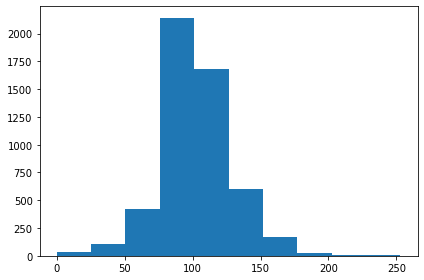

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
plt.hist(df_movie["minute"].fillna(0).astype(int))
fig.tight_layout()

- **Uso de boxplots para identificar los valores atípicos en los datos numéricos:** Otra opción para identificar los valores atípicos son los boxplots. Los boxplots dejan los valores atípicos fuera de los bigotes de la caja. Como resultado, es más fácil identificar los valores mínimos y máximos sin tener en cuenta los valores atípicos.

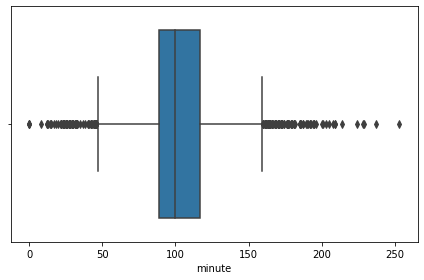

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax = sns.boxplot(x=df_movie["minute"].fillna(0).astype(int))
fig.tight_layout()

El diagrama de caja muestra que los valores inferiores a 43' y superiores a 158' son probablemente valores atípicos.

Además, se puden identificar algunos elementos del boxplot como el cuartil inferior (Q1) y el cuartil superior (Q3):

In [ ]:
df_movie["minute"].fillna(0).astype(int).describe()

count    5189.00000
mean      102.64444
std        26.07064
min         0.00000
25%        89.00000
50%       100.00000
75%       117.00000
max       253.00000
Name: minute, dtype: float64

Además, puede mostrar fácilmente todos los elementos del boxplot e incluso hacerlo interactivo con Plotly.

In [ ]:
import plotly.graph_objects as go
from plotly.offline import iplot, init_notebook_mode

fig = go.Figure()
fig.add_box(x=df_movie["minute"], text=df_movie["minute"])
iplot(fig)

- **Uso de barras para identificar los valores atípicos dentro de los datos categóricos:** En caso de que los datos sean categóricos, se pueden identificar las categorías con pocas observaciones mediante el trazado de barras.

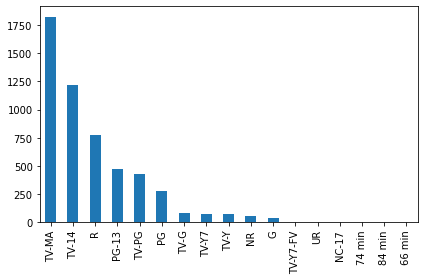

In [ ]:
fig=df_netflix_clear["rating"].value_counts().plot.bar().get_figure()
fig.tight_layout()

En el gráfico anterior, podemos ver que la moda (el valor que aparece con más frecuencia en la columna) es "TV-MA", mientras que "NC-17" y "UR" son poco comunes.

## Manejando los valores atípicos

Una vez identificados los valores atípicos, se pueden filtrar. En este ejemplo, se van a filtrar los valores atípicos tomando en cuenta en los valores revelados por el boxplot.

In [ ]:
#outliers
df_movie[(df_movie["minute"].fillna(0).astype(int)<43) | (df_movie["minute"].fillna(0).astype(int)>158)]
#filtering outliers out
df_movie = df_movie[(df_movie["minute"].fillna(0).astype(int)>43) & (df_movie["minute"].fillna(0).astype(int)<158)]

El df_movie creado ahora sólo contiene películas que duran entre 43' y 158'.